# Data Cleaning
Data cleaning is a crucial step in data analysis. This notebook will guide you through handling missing values, detecting outliers, and preparing data for analysis.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Loading the Dataset

In [3]:


# Load the CSV file into a DataFrame
df = pd.read_csv('../data/sales_data.csv')

# Show the first few rows
df.head()


,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,NaN,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,NaN,2.0,North


### Detecting Missing Data
Missing data can cause issues in analysis. Here, we identify missing values in the dataset.

In [4]:
df.isnull()


,OrderID,Product,Category,Sales,Quantity,Region
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,True,False,False,True,False
3,False,False,True,False,False,False
4,False,False,False,True,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,True,False
8,False,False,True,False,False,False
9,False,True,False,True,False,False


###  Counting Missing Values

In [5]:
df.isnull().sum()

OrderID     0
Product     2
Category    2
Sales       2
Quantity    2
Region      1
dtype: int64

###  Visualizing Missing Data

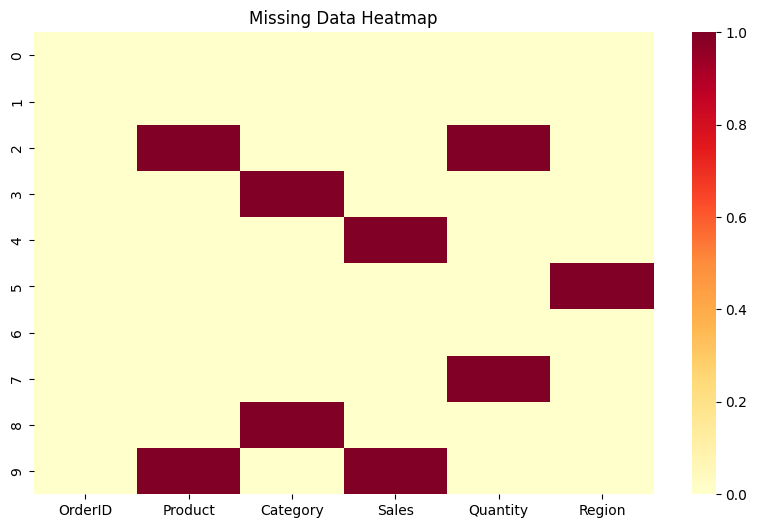

In [6]:


# Plot a heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()


### Removing Rows with Missing Data

In [7]:
# Drop rows with *any* missing values
cleaned_df = df.dropna()
cleaned_df


,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
6,1007,Chair,Furniture,89.99,1.0,South


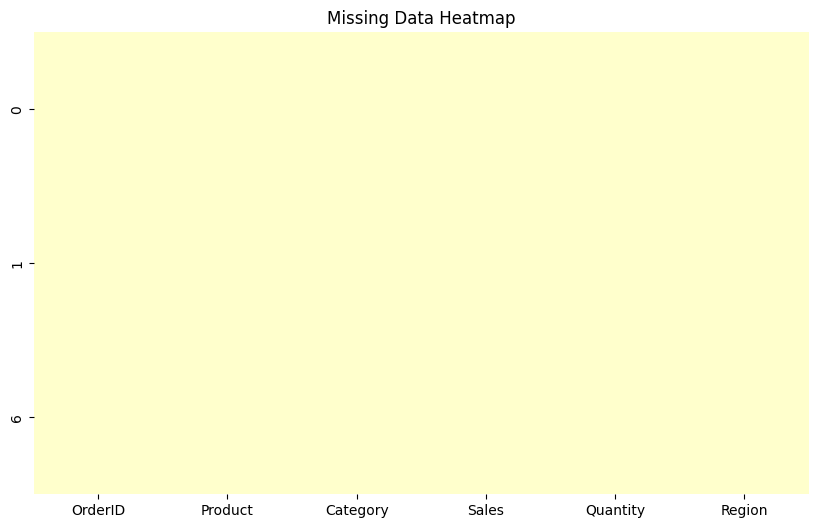

In [8]:
# Plot a heatmap to show missing values
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()

### Filling Missing Data (Imputation)
Imputation is the process of filling missing values with appropriate substitutes, such as the mean, median, or a constant value.

In [9]:
df = pd.read_csv('../data/sales_data.csv')
df 

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,NaN,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,NaN,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,NaN,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,NaN,Furniture,NaN,1.0,North


In [10]:

# Fill missing Sales with 0
df['Sales'] = df['Sales'].fillna(0)

# Fill missing Product with 'Unknown'
df['Product'] = df['Product'].fillna('Unknown')

# Fill missing Region with the most common region (mode)
most_common_region = df['Region'].mode()[0]
df['Region'] = df['Region'].fillna(most_common_region)

# Show the updated DataFrame
df


,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,Unknown,Electronics,49.99,NaN,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,0.00,2.0,North
5,1006,Desk,Furniture,199.99,1.0,East
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,NaN,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,Unknown,Furniture,0.00,1.0,North


###  Visualize Cleaned Data
After cleaning, it's important to visualize the data to ensure that the cleaning process was effective.

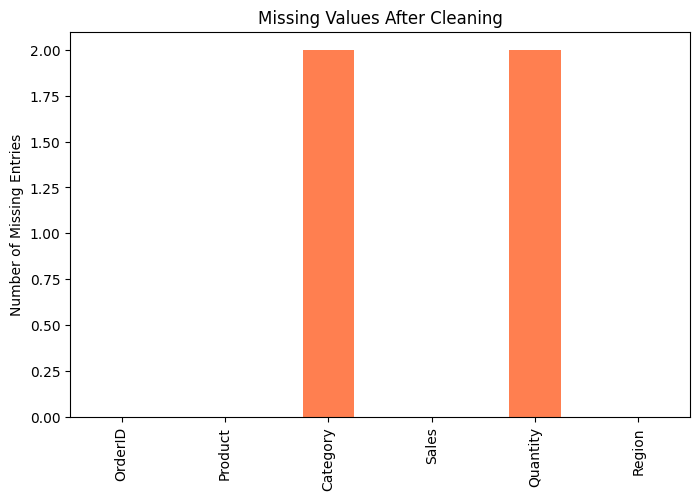

In [11]:
# Plot count of missing values before and after cleaning
missing_before = df.isnull().sum()

plt.figure(figsize=(8, 5))
missing_before.plot(kind='bar', color='coral')
plt.title("Missing Values After Cleaning")
plt.ylabel("Number of Missing Entries")
plt.show()


# To do

##### Clean the remaing columns (Category & Quantity)

### Filling Missing Numeric Data with Mean or Median

##### Using the Mean (Average)

In [12]:
df = pd.read_csv('../data/sales_data.csv') 
df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,NaN,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,NaN,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,NaN,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,NaN,Furniture,NaN,1.0,North


In [14]:
# Fill missing Sales with the average sales value
mean_sales = df['Sales'].mean()
df['Sales'] = df['Sales'].fillna(mean_sales)

df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,NaN,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,NaN,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


##### Using the Median (Middle Value)

In [15]:
# Fill missing Quantity with the median value
median_quantity = df['Quantity'].median()
df['Quantity'] = df['Quantity'].fillna(median_quantity)

df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,1.0,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


##### Filling With Common Value

In [16]:
df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,1.0,West
3,1004,Laptop,NaN,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,NaN,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


In [17]:
most_common_category = df['Category'].mode()[0]
df['Category'] = df['Category'].fillna(most_common_category)

df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,1.0,West
3,1004,Laptop,Electronics,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,Electronics,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


##### Custom Fill Logic (Using Another Column)

In [18]:
# Create a simple product-to-category map
product_category_map = {
    'Keyboard': 'Electronics',
    'Mouse': 'Electronics',
    'Laptop': 'Electronics',
    'Monitor': 'Electronics',
    'Headphones': 'Electronics',
    'Desk': 'Furniture',
    'Chair': 'Furniture'
}

# Fill missing Category values using the product_category_map
df['Category'] = df.apply(
    lambda row: product_category_map[row['Product']] if pd.isnull(row['Category']) and row['Product'] in product_category_map else row['Category'],
    axis=1
)

df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,1.0,West
3,1004,Laptop,Electronics,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,Electronics,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


In [19]:
df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,NaN,Electronics,49.99,1.0,West
3,1004,Laptop,Electronics,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,Electronics,19.99,2.0,East
9,1010,NaN,Furniture,179.99,1.0,North


In [20]:
df['Product'] = df['Product'].fillna('Unknown')

df


,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,Unknown,Electronics,49.99,1.0,West
3,1004,Laptop,Electronics,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,NaN
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,Electronics,19.99,2.0,East
9,1010,Unknown,Furniture,179.99,1.0,North


In [24]:
# Fill missing Region with the most common region (mode)
most_common_region = df['Region'].mode()[0]
df['Region'] = df['Region'].fillna(most_common_region)

df

,OrderID,Product,Category,Sales,Quantity,Region
0,1001,Keyboard,Electronics,29.99,1.0,East
1,1002,Mouse,Electronics,19.99,2.0,East
2,1003,Unknown,Electronics,49.99,1.0,West
3,1004,Laptop,Electronics,999.99,1.0,West
4,1005,Monitor,Electronics,179.99,2.0,North
5,1006,Desk,Furniture,199.99,1.0,East
6,1007,Chair,Furniture,89.99,1.0,South
7,1008,Headphones,Electronics,29.99,1.0,East
8,1009,Mouse,Electronics,19.99,2.0,East
9,1010,Unknown,Furniture,179.99,1.0,North


###  Visualize Cleaned Data

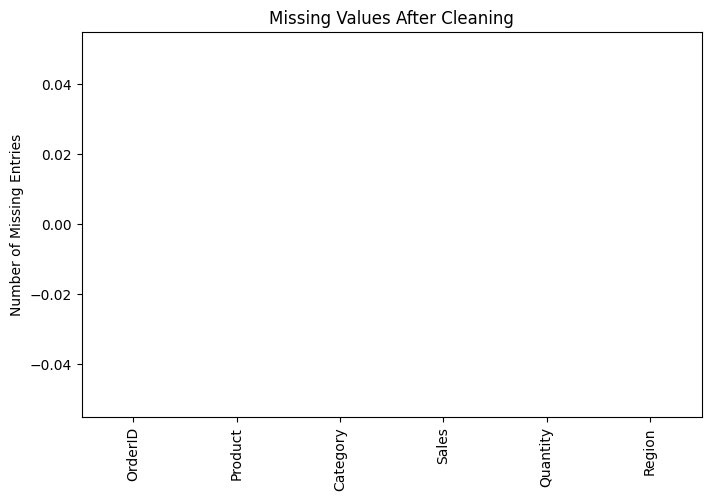

In [23]:
missing_now = df.isnull().sum()
plt.figure(figsize=(8, 5))
missing_now.plot(kind='bar', color='coral')
plt.title("Missing Values After Cleaning")
plt.ylabel("Number of Missing Entries")
plt.show()

#### Exporting the Cleaned Dataset

In [67]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('./data/cleaned_sales_data.csv', index=False)
